In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\ADITH SREE RAM\Desktop\research\data\heart.csv', sep = ',')


In [3]:
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

In [7]:
x = df.drop(['target'], axis=1)
y = df['target']

In [8]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [9]:
x = MinMaxScaler().fit_transform(x)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [11]:
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)

In [12]:
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

.:. Logistic Regression Accuracy: 82.44% .:.


In [13]:
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

In [14]:
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

.:. K-Nearest Neighbour Accuracy: 95.12% .:.


In [15]:
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

In [16]:
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

.:. Support Vector Machine Accuracy: 81.46% .:.


In [17]:
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)

In [18]:
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

.:. Gaussian Naive Bayes Accuracy: 78.54% .:.


In [19]:
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

In [20]:
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

.:. Decision Tree Accuracy: 79.02% .:.


In [21]:
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

In [22]:
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

.:. Random Forest Accuracy: 89.27% .:.


In [23]:
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)

In [24]:
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

.:. Gradient Boosting Accuracy: 88.78% .:.


In [25]:
classifier8 = XGBClassifier(random_state=42, eval_metric='logloss')
predictor_xgb = classifier8.fit(x_train, y_train)
y_pred = predictor_xgb.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
#model_dict['xgb'] = accuracy_xgb
print(accuracy_xgb)

1.0


In [26]:
dtc=DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier = AdaBoostClassifier(dtc,random_state=42)
predictor = classifier.fit(x_train, y_train)
y_pred = predictor.predict(x_test)
accuracy_ada = accuracy_score(y_test, y_pred)
#model_dict['adab'] = accuracy_ada
print(accuracy_ada)

1.0


In [27]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'SVM', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGB','ADA'
                                  ], 
                        'Accuracy': [LRAcc, KNNAcc, SVMAcc, GNBAcc, DTCAcc, RFAcc, GBAcc, 
                                     accuracy_xgb, accuracy_ada
                                     ]})

# --- Create Accuracy Comparison Table ---
df1 = compare.sort_values(by='Accuracy', ascending=False)
df1

,Model,Accuracy
7,XGB,1.000000
8,ADA,1.000000
1,K-Nearest Neighbour,0.951220
5,Random Forest,0.892683
6,Gradient Boosting,0.887805
0,Logistic Regression,0.824390
2,SVM,0.814634
4,Decision Tree,0.790244
3,Gaussian Naive Bayes,0.785366


Text(0.5, 1.0, 'Model Vs Accuracy for Heart Disease')

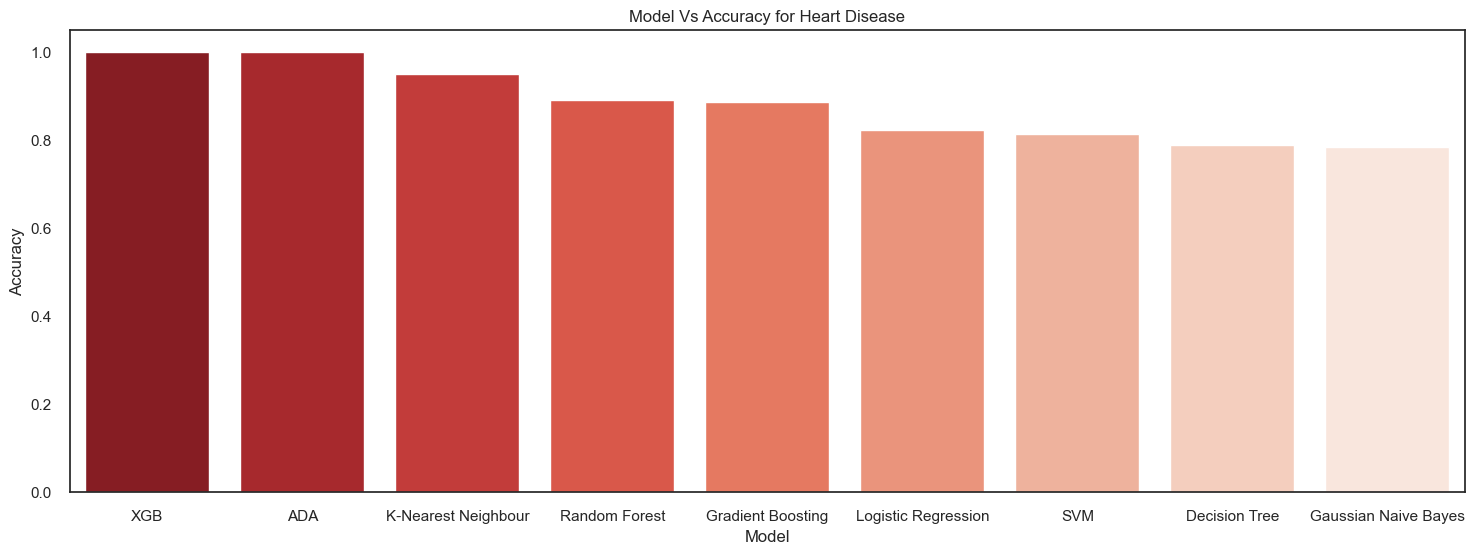

In [28]:
plt.figure(figsize=(18,6))
sns.set_theme(style='white')

sns.barplot(df1, x = 'Model', y = 'Accuracy', palette = 'Reds_r')
plt.title("Model Vs Accuracy for Heart Disease")

In [29]:
import joblib

In [30]:
file = open("heart_model", "wb")
joblib.dump(KNNClassifier,file)
file.close()